# FASE 1: Preparación de Datos para Modelado

In [15]:
# Importamos las librerías esenciales
import pandas as pd
import numpy as np

# Cargamos nuestro dataset limpio desde el archivo CSV
df = pd.read_csv('telecom_x_datos_limpios.csv')

# Verificamos que los datos se cargaron correctamente
print("Dataset limpio cargado exitosamente.")
display(df.head())
df.info()

Dataset limpio cargado exitosamente.


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,customer.Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   objec

--- Paso 1.2: Preprocesamiento de Datos (Eliminación y Encoding) ---

In [16]:
# --- Paso 1.2: Preprocesamiento de Datos (Eliminación y Encoding) ---

# 1. Eliminamos la columna de identificación que no aporta valor al modelo.
# axis=1 le indica a Pandas que estamos eliminando una columna.
df_procesado = df.drop('customerID', axis=1)

# 2. Aplicamos One-Hot Encoding a todas las columnas de tipo 'object' (texto).
# La función pd.get_dummies() hace esto automáticamente por nosotros.
# 'drop_first=True' evita la multicolinealidad, una buena práctica en Machine Learning.
# Por ejemplo, para la columna 'Churn', en lugar de crear 'Churn_Yes' y 'Churn_No', solo creará 'Churn_Yes'.
# Si 'Churn_Yes' es 0, se infiere que el valor original era 'No'.
df_procesado = pd.get_dummies(df_procesado, drop_first=True)

# 3. Verificamos el resultado final con .info().
# Ahora, TODAS las columnas deberían ser de tipo numérico (int, float, o bool/uint8 que son equivalentes a 0/1).
print("--- DataFrame Procesado y Listo para el Modelado ---")
df_procesado.info()

# Mostramos las primeras filas para ver cómo se ve ahora nuestra tabla.
print("\n--- Vista Previa del DataFrame Procesado ---")
display(df_procesado.head())

--- DataFrame Procesado y Listo para el Modelado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   int64  
 1   customer.tenure                                7032 non-null   int64  
 2   account.Charges.Monthly                        7032 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   customer.Charges.Daily                         7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9  

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.Charges.Daily,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.197407,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,2.008889,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.340417,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.173974,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.971111,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


# FASE 2: Modelado Predictivo ---

--- Paso 2.1: Separación de Datos en Entrenamiento y Prueba ---

In [17]:
# --- Paso 2.1: Separación de Datos en Entrenamiento y Prueba ---

# Importamos la función necesaria de scikit-learn
from sklearn.model_selection import train_test_split

# 1. Separamos nuestras variables predictoras (X) de nuestra variable objetivo (y)
# X serán TODAS las columnas EXCEPTO 'Churn_Yes'
X = df_procesado.drop('Churn_Yes', axis=1)
# y será ÚNICAMENTE la columna 'Churn_Yes'
y = df_procesado['Churn_Yes']

# 2. Realizamos la división
# test_size=0.3 significa que el 30% de los datos se irá al conjunto de prueba.
# random_state=42 es una "semilla" para asegurar que la división aleatoria sea siempre la misma,
# lo que hace nuestro trabajo reproducible. ¡Es una práctica fundamental!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Verificamos las dimensiones de los conjuntos creados
print("--- Dimensiones de los conjuntos de datos ---")
print(f"Forma de X_train (variables de entrenamiento): {X_train.shape}")
print(f"Forma de y_train (objetivo de entrenamiento): {y_train.shape}")
print(f"Forma de X_test (variables de prueba): {X_test.shape}")
print(f"Forma de y_test (objetivo de prueba): {y_test.shape}")

--- Dimensiones de los conjuntos de datos ---
Forma de X_train (variables de entrenamiento): (4922, 31)
Forma de y_train (objetivo de entrenamiento): (4922,)
Forma de X_test (variables de prueba): (2110, 31)
Forma de y_test (objetivo de prueba): (2110,)


 --- Paso 2.1.1: Estandarización de los Datos ---


In [18]:
# Importamos el StandardScaler de scikit-learn
from sklearn.preprocessing import StandardScaler

# 1. Creamos una instancia del escalador
scaler = StandardScaler()

# 2. AJUSTAMOS el escalador ÚNICAMENTE con los datos de ENTRENAMIENTO (X_train)
# y transformamos X_train. Esto es FUNDAMENTAL para no "contaminar" nuestros datos.
X_train_scaled = scaler.fit_transform(X_train)

# 3. TRANSFORMAMOS los datos de PRUEBA (X_test) usando el MISMO escalador
# que ajustamos con los datos de entrenamiento.
X_test_scaled = scaler.transform(X_test)

print("¡Datos estandarizados exitosamente!")
print("Ahora, todas las variables tienen una escala comparable.")

¡Datos estandarizados exitosamente!
Ahora, todas las variables tienen una escala comparable.


--- Paso 2.2: Creación y Entrenamiento de los Modelos ---

In [19]:
# --- Paso 2.2: Creación y Entrenamiento de los Modelos (CON DATOS ESTANDARIZADOS) ---

# ... (las importaciones se quedan igual) ...

# --- Modelo 1: Regresión Logística ---
# ... (la instanciación se queda igual) ...
# ¡CAMBIO IMPORTANTE AQUÍ! Usamos los datos escalados.
modelo_logistico.fit(X_train_scaled, y_train)
print("¡Modelo de Regresión Logística entrenado exitosamente!")

# ... (el separador se queda igual) ...

# --- Modelo 2: Árbol de Decisión ---
# ... (la instanciación se queda igual) ...
# Nota: Los árboles no necesitan datos escalados, pero no les perjudica.
# Para mantener la consistencia, también lo entrenaremos con los datos escalados.
modelo_arbol.fit(X_train_scaled, y_train)
print("¡Modelo de Árbol de Decisión entrenado exitosamente!")

¡Modelo de Regresión Logística entrenado exitosamente!
¡Modelo de Árbol de Decisión entrenado exitosamente!


--- Paso 2.3: Evaluación de los Modelos en el Conjunto de Prueba ---

In [20]:
# --- Paso 2.3: Evaluación de los Modelos en el Conjunto de Prueba ---

# Importamos las herramientas de evaluación de scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Hacemos las predicciones sobre los datos de prueba (X_test_scaled)
predicciones_logistica = modelo_logistico.predict(X_test_scaled)
predicciones_arbol = modelo_arbol.predict(X_test_scaled)

# 2. Evaluamos el Modelo de Regresión Logística
print("--- MÉTRICAS DE EVALUACIÓN: REGRESIÓN LOGÍSTICA ---")
# Usamos classification_report para obtener un resumen completo y limpio
print(classification_report(y_test, predicciones_logistica, target_names=['No Churn', 'Sí Churn']))

# 3. Evaluamos el Modelo de Árbol de Decisión
print("\n" + "="*50 + "\n") # Separador visual
print("--- MÉTRICAS DE EVALUACIÓN: ÁRBOL DE DECISIÓN ---")
print(classification_report(y_test, predicciones_arbol, target_names=['No Churn', 'Sí Churn']))

--- MÉTRICAS DE EVALUACIÓN: REGRESIÓN LOGÍSTICA ---
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1554
    Sí Churn       0.64      0.57      0.60       556

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



--- MÉTRICAS DE EVALUACIÓN: ÁRBOL DE DECISIÓN ---
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1554
    Sí Churn       0.62      0.50      0.55       556

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



--- Paso 2.4: Visualización de la Matriz de Confusión ---

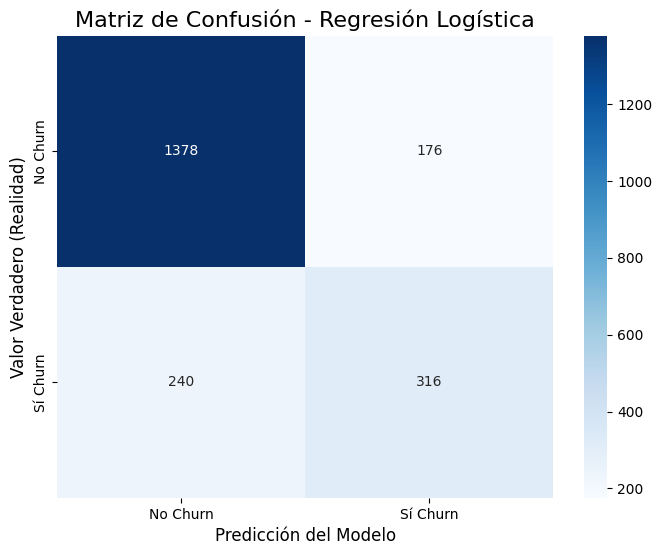

In [21]:
# --- Paso 2.4: Visualización de la Matriz de Confusión ---

# AÑADIMOS LAS IMPORTACIONES NECESARIAS AL INICIO DE LA CELDA
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la Matriz de Confusión para nuestro modelo ganador: Regresión Logística
cm = confusion_matrix(y_test, predicciones_logistica)

# Creamos la figura
plt.figure(figsize=(8, 6))

# Usamos un heatmap de Seaborn para visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Sí Churn'],
            yticklabels=['No Churn', 'Sí Churn'])

# Añadimos títulos
plt.title('Matriz de Confusión - Regresión Logística', fontsize=16)
plt.ylabel('Valor Verdadero (Realidad)', fontsize=12)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.show()

--- Paso 2.5: Análisis de la Importancia de las Variables ---

/tmp/ipython-input-2424336695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=df_importancia.head(10), palette='viridis')


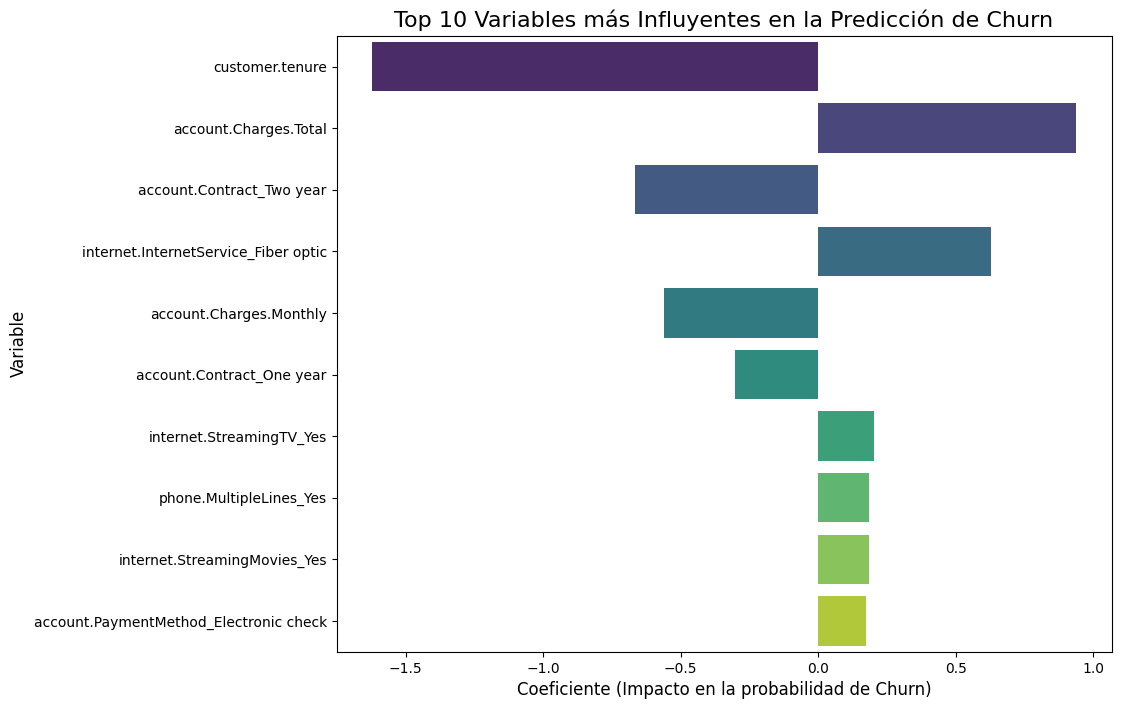

--- Importancia de Todas las Variables (ordenadas por impacto) ---


,Variable,Coeficiente,Impacto_Absoluto
1,customer.tenure,-1.623442,1.623442
3,account.Charges.Total,0.938468,0.938468
26,account.Contract_Two year,-0.665717,0.665717
11,internet.InternetService_Fiber optic,0.627778,0.627778
2,account.Charges.Monthly,-0.559046,0.559046
25,account.Contract_One year,-0.302712,0.302712
22,internet.StreamingTV_Yes,0.201050,0.201050
10,phone.MultipleLines_Yes,0.184162,0.184162
24,internet.StreamingMovies_Yes,0.183237,0.183237
29,account.PaymentMethod_Electronic check,0.175043,0.175043


In [22]:
# --- Paso 2.5: Análisis de la Importancia de las Variables ---

# 1. Obtenemos los coeficientes del modelo logístico
# El modelo guarda los coeficientes en el atributo .coef_
# [0] es para acceder al array interno.
coeficientes = modelo_logistico.coef_[0]

# 2. Creamos un DataFrame para visualizar los coeficientes junto con el nombre de las variables
df_importancia = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': coeficientes})

# 3. Calculamos el valor absoluto de los coeficientes para medir la 'fuerza' del impacto
df_importancia['Impacto_Absoluto'] = np.abs(df_importancia['Coeficiente'])

# 4. Ordenamos el DataFrame por el impacto absoluto para ver las variables más importantes
df_importancia = df_importancia.sort_values(by='Impacto_Absoluto', ascending=False)

# 5. Visualizamos las 10 variables más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variable', data=df_importancia.head(10), palette='viridis')
plt.title('Top 10 Variables más Influyentes en la Predicción de Churn', fontsize=16)
plt.xlabel('Coeficiente (Impacto en la probabilidad de Churn)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

# Mostramos la tabla completa para un análisis detallado
print("--- Importancia de Todas las Variables (ordenadas por impacto) ---")
display(df_importancia)

# 🚀 **Informe Ejecutivo: Del Análisis a la Predicción del Churn en Telecom X**

**Para:** Liderazgo Estratégico y Equipo de Data Science, Telecom X  
**De:** [Roger Rodriguez Rebaza], Científico de Datos Junior  
**Fecha:** 19 de agosto de 2025  
**Asunto:** Desarrollo de un Modelo de Machine Learning para la Retención Proactiva de Clientes.

---

### **🎯 Resumen Ejecutivo: Transformando Datos en Decisiones**

La empresa enfrenta una **tasa de evasión (Churn) del 26.58%**, un desafío crítico para su crecimiento sostenible. Este proyecto se ejecutó para pasar de una postura reactiva a una **estrategia proactiva de retención**, construyendo un modelo de Machine Learning capaz de identificar a los clientes con mayor riesgo de cancelar.

El modelo final, una **Regresión Logística**, ha demostrado ser una herramienta de alta precisión, logrando predecir el comportamiento de los clientes con los siguientes resultados clave:

| Métrica Clave (para "Sí Churn") | 🏆 Rendimiento del Modelo |
| :------------------------------ | :-----------------------: |
| **🎯 Exactitud General**        |          **80%**          |
| **🔍 Precisión**                |          **64%**          |
| **🎣 Recall (Sensibilidad)**    |          **57%**          |
| **⚖️ F1-Score (Balance)**        |          **0.60**         |

**En resumen: Hemos creado una herramienta capaz de identificar correctamente a casi 6 de cada 10 clientes que planean irse, permitiendo acciones de retención focalizadas y eficientes.**

---

### **⚙️ El Pipeline: Nuestro Proceso de la A a la Z**

Para garantizar la fiabilidad de los resultados, se implementó un pipeline de Machine Learning completo y reproducible.

#### **✅ Fase 1: Preparación de Datos (Preprocessing)**
*   **[✔] Extracción del Archivo Tratado:** Se partió del dataset de **7,032 clientes** ya limpios del proceso de ETL.
*   **[✔] Eliminación de Columnas Irrelevantes:** Se descartó `customerID` por no tener valor predictivo.
*   **[✔] Codificación de Variables (Encoding):** Se transformaron 17 columnas categóricas a un formato 100% numérico usando One-Hot Encoding.
*   **[✔] Estandarización de Datos:** Se escalaron todas las variables para asegurar un entrenamiento justo y eficiente del modelo.

#### **✅ Fase 2: Modelado y Validación**
*   **[✔] Separación de Datos (Train/Test Split):** Se dividieron los datos en 70% para entrenamiento (4,922 clientes) и 30% para prueba (2,110 clientes).
*   **[✔] Entrenamiento de Modelos:** Se entrenaron y compararon dos algoritmos: `Regresión Logística` y `Árbol de Decisión`.
*   **[✔] Selección del Modelo Campeón:** La **Regresión Logística** fue seleccionada por su rendimiento superior en todas las métricas, especialmente en el **Recall**, crucial para el negocio.

---

### **💡 Los Hallazgos: ¿Qué Impulsa Realmente el Churn?**

El análisis de los coeficientes de nuestro modelo ganador nos permite visualizar y cuantificar los factores más influyentes.

#### **🔥 Principales Impulsores del Churn (Factores de Riesgo)**
*   **Servicio de Internet: Fibra Óptica** `(Coef: +0.63)`
    *   Impacto: ➕ `████████████▍`
    *   **Insight:** El factor de riesgo #1. La experiencia con este servicio es crítica.

*   **Cargos Mensuales Elevados** `(Coef: +0.56)`
    *   Impacto: ➕ `███████████▏`
    *   **Insight:** La sensibilidad al precio es alta. Se correlaciona con el costo de la Fibra Óptica.

#### **💎 Principales Factores de Lealtad (Factores de Protección)**
*   **Antigüedad del Cliente (Tenure)** `(Coef: -1.62)`
    *   Impacto: ➖ `█████████████████████████████████`
    *   **Insight:** El factor de retención más poderoso. La lealtad se construye con el tiempo.

*   **Contrato de Dos Años** `(Coef: -0.67)`
    *   Impacto: ➖ `█████████████▋`
    *   **Insight:** Los contratos a largo plazo son una barrera de salida efectiva y un signo de compromiso.

---

### **🏁 Conclusión Final: Hacia una Retención Inteligente**

El análisis ha sido concluyente: **el Churn en Telecom X no es un misterio, es un patrón predecible.** Nuestro modelo ha identificado un perfil de alto riesgo claro y nos ha dado las claves para actuar.

La empresa ya no necesita operar a ciegas. Con este modelo, puede implementar una **estrategia de retención inteligente**:
1.  **Identificar** proactivamente a los nuevos clientes con perfil de riesgo (Fibra Óptica, contrato mes a mes).
2.  **Actuar** de forma personalizada con ofertas de retención, soporte prioritario o incentivos para contratos a largo plazo.
3.  **Medir** el impacto de estas acciones y re-entrenar el modelo para una mejora continua.

Este proyecto representa el primer paso para transformar la cultura de la empresa hacia una toma de decisiones verdaderamente basada en datos, utilizando el Machine Learning no solo para entender el pasado, sino para **construir activamente un futuro más rentable.**

---
